In [1]:
#main
import pandas as pd
import numpy as np
import math
import sklearn
import re
import pickle

#graphic
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
def dtype_convert(df):
    to_convert = ['accident_index', 'accident_reference','police_force', 
                           'accident_severity', 'day_of_week', 'local_authority_district', 
                           'local_authority_ons_district','local_authority_highway', 'first_road_class', 
                           'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 
                           'junction_control', 'second_road_class', 'second_road_number',
                           'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 
                           'light_conditions', 'weather_conditions', 'road_surface_conditions', 
                           'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area',
                           'did_police_officer_attend_scene_of_accident', 'trunk_road_flag',
                           'lsoa_of_accident_location', 'month', 'hour', 'easting_binned', 
                           'northing_binned','vehicle_reference', 'vehicle_type', 
                           'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from',
                           'vehicle_direction_to','vehicle_location_restricted_lane', 'junction_location',
                           'skidding_and_overturning', 'hit_object_in_carriageway',
                           'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
                           'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver',
                           'sex_of_driver', 'age_band_of_driver', 'propulsion_code','generic_make_model', 
                           'driver_imd_decile','driver_home_area_type', 'vehicle_brand']
    
    df[to_convert] = df[to_convert].astype(object)
    
    return df

# Reading the clean data

In [4]:
all_df = pd.read_csv('Veh_Acc_treated_for_model.csv')


C:\Users\ecyildirim\AppData\Local\Temp\ipykernel_7896\2942593274.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df = pd.read_csv('Veh_Acc_treated_for_model.csv')


In [5]:
all_df= dtype_convert(all_df)

display(all_df.dtypes)


Unnamed: 0                                       int64
accident_year                                    int64
age_of_driver                                    int64
engine_capacity_cc                               int64
age_of_vehicle                                   int64
accident_index                                  object
accident_reference                              object
vehicle_reference                               object
vehicle_type                                    object
towing_and_articulation                         object
vehicle_manoeuvre                               object
vehicle_direction_from                          object
vehicle_direction_to                            object
vehicle_location_restricted_lane                object
junction_location                               object
skidding_and_overturning                        object
hit_object_in_carriageway                       object
vehicle_leaving_carriageway                     object
hit_object

In [6]:
all_df = all_df.drop(['Unnamed: 0'], axis=1)

display(all_df.shape)

(1077499, 64)

In [7]:
all_df.head()

,accident_year,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,vehicle_brand,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,police_force,accident_severity,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,hour,easting_binned,northing_binned
0,2016,51,1856,7,2016010000005,10000005,1,8.0,0.0,6.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,8.0,1.0,Other,3.0,1.0,Other,519310.0,188730.0,-0.279323,51.584754,2,1,1,Slight,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1,2,J,N
1,2016,23,124,4,2016010000005,10000005,2,2.0,0.0,16.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,4.0,1.0,Other,519310.0,188730.0,-0.279323,51.584754,2,1,1,Slight,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1,2,J,N
2,2016,36,1461,1,2016010000006,10000006,1,9.0,0.0,16.0,5.0,1.0,0.0,2.0,5.0,80.0,1.0,0.0,4.0,1.0,5.0,2.0,7.0,1.0,Other,10.0,1.0,Other,551920.0,174560.0,0.184928,51.449595,1,1,1,Slight,3,00:37,18.0,E09000004,E09000004,3,207,6.0,30.0,80.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000375,1,0,J,N
3,2016,24,1390,5,2016010000008,10000008,1,9.0,0.0,16.0,1.0,8.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,8.0,1.0,Other,505930.0,183850.0,-0.473837,51.543563,1,1,1,Slight,3,01:25,26.0,E09000017,E09000017,3,4020,1.0,30.0,1.0,4.0,3.0,4020.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01033725,1,1,I,N
4,2016,55,6692,7,2016010000016,10000016,1,11.0,0.0,16.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,1.0,Other,9.0,1.0,Other,527770.0,168930.0,-0.164442,51.404958,1,1,1,Slight,3,09:15,22.0,E09000024,E09000024,3,217,6.0,30.0,3.0,2.0,3.0,217.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003379,1,9,J,N


In [8]:
all_df['accident_severity'] = all_df['accident_severity'].replace({'Slight':'0', 'Serious':'1'}).astype(int)

In [9]:
display(all_df.dtypes)

accident_year                                    int64
age_of_driver                                    int64
engine_capacity_cc                               int64
age_of_vehicle                                   int64
accident_index                                  object
accident_reference                              object
vehicle_reference                               object
vehicle_type                                    object
towing_and_articulation                         object
vehicle_manoeuvre                               object
vehicle_direction_from                          object
vehicle_direction_to                            object
vehicle_location_restricted_lane                object
junction_location                               object
skidding_and_overturning                        object
hit_object_in_carriageway                       object
vehicle_leaving_carriageway                     object
hit_object_off_carriageway                      object
first_poin

# Unpickling the transformer, encoder, feature selector, and the best model

In [10]:
transformer = pickle.load(open('minmaxtransformer_38features.p', 'rb'))
encoder = pickle.load(open('onehotencoder_38features.p', 'rb'))
model = pickle.load(open('DecisionTreeClassifier_6.p', 'rb'))

with open('selected_cat_cols.p', 'rb') as f:
    selected_encoded_cols = pickle.load(f)

# Validation (on data from 2016)

In [11]:
all_df_2016 = all_df[all_df.accident_year == 2016]

In [12]:
all_df_2016.shape

(247441, 64)

## X-y split

In [13]:
y = all_df_2016['accident_severity']
X = all_df_2016.drop(columns=['accident_severity'], axis=1)

X=X[['age_of_driver', 'engine_capacity_cc', 'age_of_vehicle','vehicle_type','vehicle_brand',
       'vehicle_manoeuvre','junction_location','first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver','propulsion_code', 'towing_and_articulation',
       'driver_imd_decile','driver_home_area_type', 'day_of_week', 'month','hour',
       'easting_binned','northing_binned', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'first_road_class','road_type', 'speed_limit', 
       'junction_detail', 'junction_control', 'second_road_class','pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions',
       'road_surface_conditions','special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area','trunk_road_flag']]


display(y.shape)
display(X.shape)

(247441,)

(247441, 38)

## Ordinal Encoding

In [14]:
X["vehicle_type"] = X["vehicle_type"].replace({"1" : "1", "2" : "2", "3" : "2", "4" : "2", "5" : "2", "8" : "3", "9" : "3"
                                          , "10" : "4", "11" : "5", "16" : "2", "17" : "5", "18" : "6", "19" : "7", 
                                           "20" : "7", "21" : "7", "22" : "2", "23" : "2", "90" : "3", "97" : "2",
                                           "98" : "7", "99" : "3", "103" : "2", "104" : "2", "105" : "2", "106" : "2",
                                           "108" : "3", "109" : "3", "110" : "4", 
                                           "103" : "7" }).astype(int)

X["vehicle_type"] = pd.to_numeric(X["vehicle_type"], errors='coerce')

X.head()


,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_brand,vehicle_manoeuvre,junction_location,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,propulsion_code,towing_and_articulation,driver_imd_decile,driver_home_area_type,day_of_week,month,hour,easting_binned,northing_binned,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
0,51,1856,7,8,Other,6.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,3,1,2,J,N,3.0,7.0,0.0,3,6.0,30.0,0.0,4.0,6.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,2.0
1,23,124,4,2,Other,16.0,0.0,1.0,1.0,5.0,1.0,1.0,0.0,4.0,1.0,3,1,2,J,N,7.0,3.0,0.0,3,6.0,30.0,0.0,4.0,6.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,2.0
2,36,1461,1,9,Other,16.0,2.0,4.0,1.0,5.0,2.0,1.0,0.0,10.0,1.0,3,1,0,J,N,5.0,1.0,0.0,3,6.0,30.0,80.0,4.0,6.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0
3,24,1390,5,9,Other,16.0,3.0,1.0,1.0,5.0,1.0,1.0,0.0,8.0,1.0,3,1,1,I,N,1.0,8.0,0.0,3,1.0,30.0,1.0,4.0,3.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0
4,55,6692,7,11,Other,16.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,9.0,1.0,3,1,9,J,N,5.0,1.0,0.0,3,6.0,30.0,3.0,2.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0


## MinMaxScaling and OneHotEncoding

In [15]:
# MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
X_num = X.select_dtypes(include = np.number) # for numericals

X_normalized = transformer.transform(X_num) # using the transformer that was trained on the training data
X_norm = pd.DataFrame(X_normalized)

# OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
X_categorical = X.select_dtypes(include = object) # for categoricals
cols=encoder.get_feature_names_out(input_features=X_categorical.columns)

encoded = encoder.transform(X_categorical).toarray() # using the encoder that was trained on the training data
X_cat = pd.DataFrame(encoded,columns=cols)
X_cat.head()


C:\Users\ecyildirim\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_80.0,towing_and_articulation_80.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_surface_conditions_80.0,special_conditions_at_site_1.0,special_conditions_at_site_2.0,special_conditions_at_site_3.0,special_conditions_at_site_4.0,special_conditions_at_site_5.0,special_conditions_at_site_6.0,special_conditions_at_site_7.0,carriageway_hazards_1.0,carriageway_hazards_2.0,carriageway_hazards_3.0,carriageway_hazards_6.0,carriageway_hazards_7.0,urban_or_rural_area_2.0,trunk_road_flag_2.0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [16]:
display(X_norm.shape)
display(X_cat.shape)

(247441, 4)

(247441, 182)

In [17]:
X_cat = X_cat[selected_encoded_cols]

In [18]:
X_transformed = np.concatenate([X_norm, X_cat], axis=1) # Concatenation

## Prediction

In [19]:
from sklearn.tree import DecisionTreeClassifier
pred_validation = model.predict(X_transformed)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("precision: ",precision_score(y,pred_validation,pos_label=1))
print("recall: ",recall_score(y,pred_validation,pos_label=1))
print("f1: ",f1_score(y,pred_validation,pos_label=1))

precision:  0.16967512413993785
recall:  0.9342084862266784
f1:  0.2871895902511876


In [20]:
print(y.value_counts())

0    208743
1     38698
Name: accident_severity, dtype: int64


In [21]:
pd.Series(pred_validation).value_counts()

1    213066
0     34375
dtype: int64

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,pred_validation)

array([[ 31829, 176914],
       [  2546,  36152]], dtype=int64)

C:\Users\ecyildirim\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


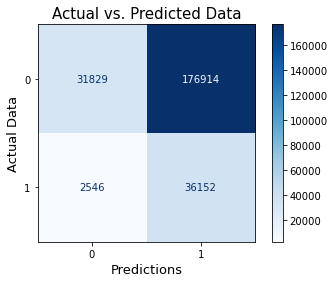

In [23]:
from sklearn.metrics import plot_confusion_matrix

fig_1 = plot_confusion_matrix(model, X_transformed, y, cmap = plt.cm.Blues)
plt.title('Actual vs. Predicted Data', fontsize=15)
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Actual Data', fontsize=13)
plt.show()

# Validation (on data from 2020)

In [25]:
all_df_2020 = all_df[all_df.accident_year == 2020]

In [26]:
all_df_2020.shape

(163421, 64)

In [27]:
all_df_2020.head()

,accident_year,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,vehicle_brand,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,police_force,accident_severity,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,hour,easting_binned,northing_binned
914078,2020,32,1968,6,2020010219808,010219808,1,9.0,0.0,5.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,2.0,6.0,1.0,AUDI Q5,4.0,1.0,AUDI,521389.0,175144.0,-0.254001,51.462262,1,1,1,0,3,09:00,10.0,E09000032,E09000032,6,0,6.0,20.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,2.0,E01004576,4,9,J,N
914079,2020,45,1395,2,2020010220496,010220496,1,9.0,0.0,4.0,2.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,7.0,1.0,AUDI A1,7.0,1.0,AUDI,529337.0,176237.0,-0.139253,51.470327,1,2,1,0,2,13:55,9.0,E09000022,E09000022,3,3036,6.0,20.0,80.0,2.0,6.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003034,4,13,J,N
914080,2020,40,1856,7,2020010228005,010228005,1,9.0,0.0,16.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,6.0,1.0,Other,2.0,1.0,Other,526432.0,182761.0,-0.178719,51.529614,1,1,1,0,4,01:25,1.0,E09000033,E09000033,5,0,6.0,30.0,3.0,1.0,6.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,E01004726,1,1,J,N
914081,2020,44,1798,8,2020010228006,010228006,1,8.0,0.0,16.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,7.0,80.0,TOYOTA PRIUS,2.0,1.0,TOYOTA,538676.0,184371.0,-0.001683,51.541210,1,1,1,1,4,01:50,17.0,E09000025,E09000025,3,11,6.0,30.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003617,1,1,J,N
914082,2020,20,2993,4,2020010228011,010228011,1,9.0,0.0,16.0,3.0,7.0,9.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,4.0,1.0,BMW 4 SERIES,2.0,1.0,BMW,529324.0,181286.0,-0.137592,51.515704,1,2,1,0,4,02:25,1.0,E09000033,E09000033,3,40,6.0,30.0,3.0,4.0,5.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01004763,1,2,J,N


## X-y split

In [28]:
y = all_df_2020['accident_severity']
X = all_df_2020.drop(columns=['accident_severity'], axis=1)

X=X[['age_of_driver', 'engine_capacity_cc', 'age_of_vehicle','vehicle_type','vehicle_brand',
       'vehicle_manoeuvre','junction_location','first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver','propulsion_code', 'towing_and_articulation',
       'driver_imd_decile','driver_home_area_type', 'day_of_week', 'month','hour',
       'easting_binned','northing_binned', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'first_road_class','road_type', 'speed_limit', 
       'junction_detail', 'junction_control', 'second_road_class','pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions',
       'road_surface_conditions','special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area','trunk_road_flag']]

display(y.shape)
display(X.shape)

(163421,)

(163421, 38)

## Ordinal Encoding

In [29]:
X["vehicle_type"] = X["vehicle_type"].replace({"1" : "1", "2" : "2", "3" : "2", "4" : "2", "5" : "2", "8" : "3", "9" : "3"
                                          , "10" : "4", "11" : "5", "16" : "2", "17" : "5", "18" : "6", "19" : "7", 
                                           "20" : "7", "21" : "7", "22" : "2", "23" : "2", "90" : "3", "97" : "2",
                                           "98" : "7", "99" : "3", "103" : "2", "104" : "2", "105" : "2", "106" : "2",
                                           "108" : "3", "109" : "3", "110" : "4", 
                                           "103" : "7" }).astype(int)

X["vehicle_type"] = pd.to_numeric(X["vehicle_type"], errors='coerce')

X.head()


,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_brand,vehicle_manoeuvre,junction_location,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,propulsion_code,towing_and_articulation,driver_imd_decile,driver_home_area_type,day_of_week,month,hour,easting_binned,northing_binned,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
914078,32,1968,6,9,AUDI,5.0,0.0,4.0,1.0,5.0,2.0,1.0,0.0,4.0,1.0,3,4,9,J,N,1.0,5.0,0.0,6,6.0,20.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0
914079,45,1395,2,9,AUDI,4.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,7.0,1.0,2,4,13,J,N,2.0,6.0,0.0,3,6.0,20.0,80.0,2.0,6.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0
914080,40,1856,7,9,Other,16.0,0.0,1.0,1.0,5.0,1.0,1.0,0.0,2.0,1.0,4,1,1,J,N,1.0,5.0,0.0,5,6.0,30.0,3.0,1.0,6.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,2.0
914081,44,1798,8,8,TOYOTA,16.0,0.0,1.0,1.0,1.0,1.0,80.0,0.0,2.0,1.0,4,1,1,J,N,1.0,5.0,0.0,3,6.0,30.0,0.0,4.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0
914082,20,2993,4,9,BMW,16.0,1.0,1.0,1.0,5.0,1.0,1.0,0.0,2.0,1.0,4,1,2,J,N,3.0,7.0,9.0,3,6.0,30.0,3.0,4.0,5.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0


## MinMaxScaling and OneHotEncoding

In [30]:
# MinMaxScaling
X_num = X.select_dtypes(include = np.number) # for numericals

X_normalized = transformer.transform(X_num) # using the transformer that was trained on the training data
X_norm = pd.DataFrame(X_normalized)

# OneHotEncoding
X_categorical = X.select_dtypes(include = object) # for categoricals
cols=encoder.get_feature_names_out(input_features=X_categorical.columns)

encoded = encoder.transform(X_categorical).toarray() # using the encoder that was trained on the training data
X_cat = pd.DataFrame(encoded,columns=cols)
X_cat.head()


C:\Users\ecyildirim\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_80.0,towing_and_articulation_80.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_surface_conditions_80.0,special_conditions_at_site_1.0,special_conditions_at_site_2.0,special_conditions_at_site_3.0,special_conditions_at_site_4.0,special_conditions_at_site_5.0,special_conditions_at_site_6.0,special_conditions_at_site_7.0,carriageway_hazards_1.0,carriageway_hazards_2.0,carriageway_hazards_3.0,carriageway_hazards_6.0,carriageway_hazards_7.0,urban_or_rural_area_2.0,trunk_road_flag_2.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [31]:
display(X_norm.shape)
display(X_cat.shape)

(163421, 4)

(163421, 182)

In [32]:
X_cat = X_cat[selected_encoded_cols]

In [33]:
# Concatenation
X_transformed = np.concatenate([X_norm, X_cat], axis=1)

## Prediction

In [34]:
pred_validation_2020 = model.predict(X_transformed)

print("precision: ",precision_score(y,pred_validation_2020,pos_label=1))
print("recall: ",recall_score(y,pred_validation_2020,pos_label=1))
print("f1: ",f1_score(y,pred_validation_2020,pos_label=1))

precision:  0.21148446084349606
recall:  0.9441904127426339
f1:  0.34556708800434455


In [35]:
print(y.value_counts())

0    130398
1     33023
Name: accident_severity, dtype: int64


In [36]:
pd.Series(pred_validation_2020).value_counts()

1    147434
0     15987
dtype: int64

In [37]:
confusion_matrix(y,pred_validation_2020)

array([[ 14144, 116254],
       [  1843,  31180]], dtype=int64)

In [38]:
# predicted        |  Slight    | Serious  
# --------------------------------------
# actual  Slight  |   14144    |  116254
# --------------------------------------
#         Serious |    1843   |  31180   
# --------------------------------------


C:\Users\ecyildirim\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


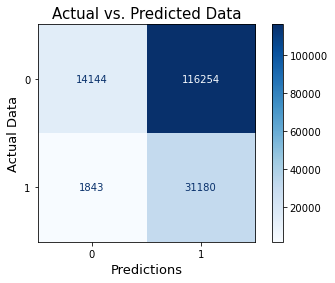

In [39]:
fig_2 = plot_confusion_matrix(model, X_transformed, y, cmap = plt.cm.Blues)
plt.title('Actual vs. Predicted Data', fontsize=15)
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Actual Data', fontsize=13)
plt.show()